In [2]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

# Import data

In [3]:
week_dict = {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7}
drugs = pd.read_csv('saleshourly.csv', index_col=0)
drugs['Weekday Num'] = [week_dict[day] for day in drugs['Weekday Name']]
drug_list = drugs.columns[:8]
drugs.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,Weekday Num
datum,,,,,,,,,,,,,
1/2/2014 8:00,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,2014,1,8,Thursday,5
1/2/2014 9:00,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,2014,1,9,Thursday,5
1/2/2014 10:00,0.0,0.00,0.0,3.0,2.0,0.0,0.0,0.0,2014,1,10,Thursday,5
1/2/2014 11:00,0.0,0.00,0.0,2.0,1.0,0.0,0.0,0.0,2014,1,11,Thursday,5
1/2/2014 12:00,0.0,2.00,0.0,5.0,2.0,0.0,0.0,0.0,2014,1,12,Thursday,5


## PCA

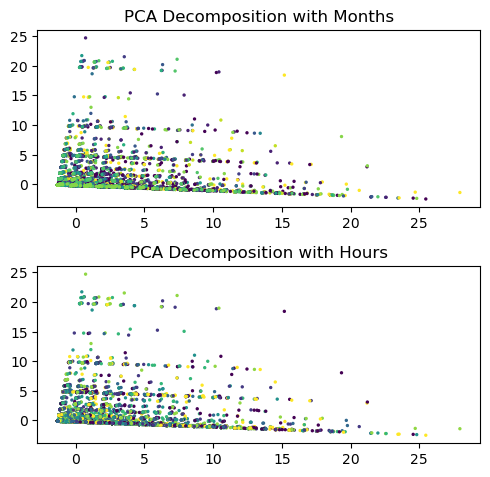

In [4]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(drugs[drug_list])
pca_data = pca.transform(drugs[drug_list])

# Show plot
plt.figure(figsize=(5,7))
plt.subplot(3,1,1)
plt.scatter(pca_data[:,0], pca_data[:,1], s=2, c=list(drugs['Month']))
plt.title('PCA Decomposition with Months')

# Show plot
plt.subplot(3,1,2)
plt.scatter(pca_data[:,0], pca_data[:,1], s=2, c=list(drugs['Weekday Num']))
plt.title('PCA Decomposition with Hours')

plt.tight_layout()
plt.savefig('PCA.png')
plt.show()

# Try to identify days of the week with clustering

In [4]:
# Fit Gaussian model
gmm = GaussianMixture(n_components=7)
gmm.fit(drugs[drug_list])

# Get labels
labels = gmm.predict(drugs[drug_list])
cluster_df = pd.DataFrame(drugs[drug_list])
cluster_df['cluster'] = labels
cluster_df['day'] = list(drugs['Weekday Num'])

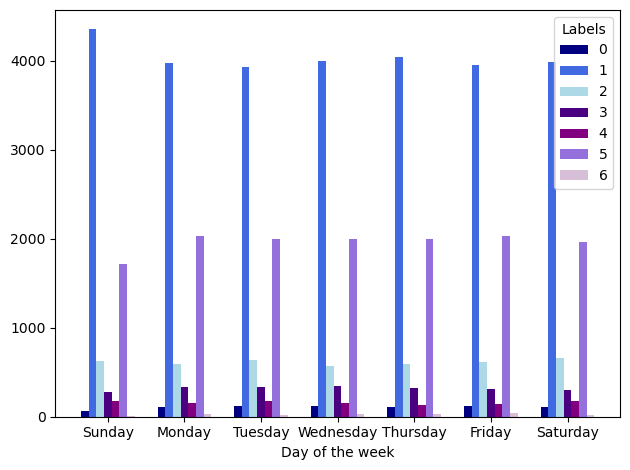

In [13]:
# Set initial variables
X = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
_X = np.arange(len(X))
location = [-.3,-.2,-.1,0,.1,.2,.3]
colors = ['navy', 'royalblue', 'lightblue', 'indigo', 'purple', 'mediumpurple','thistle']

# Create plot
for i in range(7):
    labels = cluster_df.groupby('cluster').get_group(i)['day'].value_counts().sort_index()
    for j in range(1,8):
        if j not in labels.index.values:
            labels[j] = 0
    plt.bar(_X + location[i], labels, 0.1, label=i, color=colors[i])

# Show plot
plt.xticks(_X, X) # set labels manually
plt.xlabel('Day of the week')
plt.tight_layout()
plt.legend(title='Labels')
plt.show()

This graph shows that there is no correlation between days of the week and clustering

In [6]:
# Fit Gaussian model
gmm_month = GaussianMixture(n_components=12)
gmm_month.fit(drugs[drug_list])

# Get labels
labels_month = gmm_month.predict(drugs[drug_list])
cluster_month_df = pd.DataFrame(drugs[drug_list])
cluster_month_df['cluster'] = labels_month
cluster_month_df['month'] = list(drugs['Month'])
# cluster_df.columns = ['Component_1', 'Component_2', 'cluster']

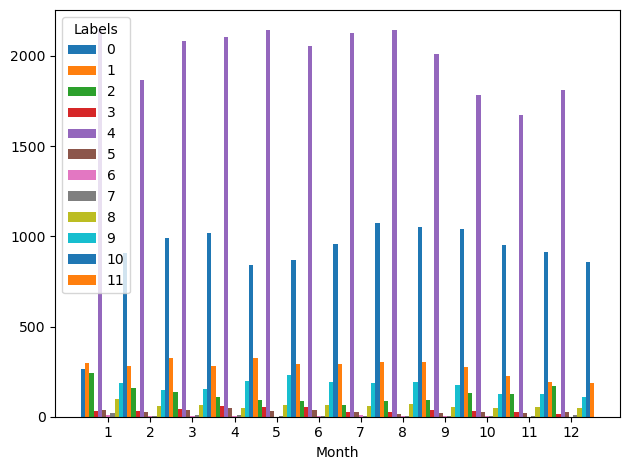

In [14]:
# Set initial variables
X = np.arange(1,13)
_X = np.arange(len(X))
location = [-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6]
#colors = ['navy', 'royalblue', 'lightblue', 'indigo', 'purple', 'mediumpurple','thistle']

# Create plot
for i in range(12):
    labels = cluster_month_df.groupby('cluster').get_group(i)['month'].value_counts().sort_index()
    for j in range(1,13):
        if j not in labels.index.values:
            labels[j] = 0
    plt.bar(_X + location[i], labels, 0.1, label=i)

# Show plot
plt.xticks(_X, X) # set labels manually
plt.xlabel('Month')
plt.tight_layout()
plt.legend(title='Labels')
plt.show()

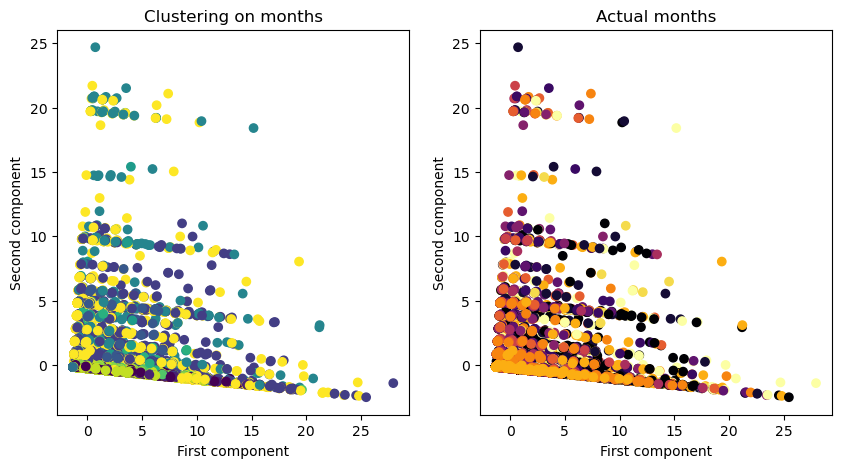

In [12]:
# Show plot of clustering on months
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_month_df['cluster'])
plt.title('Clustering on months')
plt.xlabel('First component')
plt.ylabel('Second component')

# Show plot of month labels
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_month_df['month'],cmap='inferno')
plt.title('Actual months')
plt.ylabel('Second component')
plt.xlabel('First component')
plt.show()